In [16]:
import pandas as pd
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
df = pd.read_csv('small_data.csv')
df

,Дата,Базисное значение,Среднесуточное значение,Текущее значение
0,2004-01-01 00:00:00,0,-25,-23
1,2004-01-01 01:00:00,0,-25,-25
2,2004-01-01 02:00:00,0,-25,-34
3,2004-01-01 03:00:00,0,-25,-33
4,2004-01-01 04:00:00,0,-25,-31
...,...,...,...,...
100445,2014-12-31 20:00:00,0,-17,-27
100446,2014-12-31 21:00:00,0,-17,-27
100447,2014-12-31 22:00:00,0,-17,-23
100448,2014-12-31 23:00:00,0,-17,-23


In [17]:
timeSeries = df.loc[:, ['Дата', 'Текущее значение']]
timeSeries.index = timeSeries['Дата']
ts = timeSeries.drop(['Дата'],axis=1)

In [19]:
ts = ts.iloc[-10000:]

In [20]:
values = ts.values

In [7]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	agg = concat(cols, axis=1)
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [9]:
def random_forest_forecast(train, testX):
	train = asarray(train)
	trainX, trainy = train[:, :-1], train[:, -1]
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	yhat = model.predict([testX])
	return yhat[0]

In [26]:
def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = random_forest_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    mae = mean_absolute_error(test[:, -1], predictions)
    mse = mean_squared_error(test[:, -1], predictions)
    mape = mean_absolute_percentage_error(test[:, -1], predictions)
    return mae, mse, mape, test[:, -1], predictions

In [27]:
data = series_to_supervised(values, n_in=6)

In [28]:
ts

,Текущее значение
Дата,
2013-11-27 00:00:00,17
2013-11-27 01:00:00,19
2013-11-27 02:00:00,18
2013-11-27 03:00:00,16
2013-11-27 04:00:00,13
...,...
2014-12-31 20:00:00,-27
2014-12-31 21:00:00,-27
2014-12-31 22:00:00,-23


In [29]:
mae, mse, mape, y, yhat = walk_forward_validation(data, 2999)
print('MAE: %.3f' % mae)

>expected=-20.0, predicted=-20.0
>expected=-21.0, predicted=-21.0
>expected=-22.0, predicted=-21.1
>expected=-23.0, predicted=-21.6
>expected=-23.0, predicted=-21.0
>expected=-23.0, predicted=-22.2
>expected=-21.0, predicted=-21.8
>expected=-20.0, predicted=-18.9
>expected=-19.0, predicted=-17.7
>expected=-20.0, predicted=-19.0
>expected=-16.0, predicted=-19.5
>expected=-14.0, predicted=-15.7
>expected=-9.0, predicted=-13.8
>expected=-9.0, predicted=-5.4
>expected=-12.0, predicted=-8.6
>expected=-17.0, predicted=-16.2
>expected=-16.0, predicted=-18.8
>expected=-15.0, predicted=-15.2
>expected=-15.0, predicted=-13.3
>expected=-14.0, predicted=-14.4
>expected=-14.0, predicted=-13.2
>expected=-14.0, predicted=-12.8
>expected=-14.0, predicted=-13.7
>expected=-17.0, predicted=-13.4
>expected=-16.0, predicted=-16.8
>expected=-19.0, predicted=-14.4
>expected=-19.0, predicted=-18.7
>expected=-20.0, predicted=-18.8
>expected=-24.0, predicted=-18.0
>expected=-25.0, predicted=-24.3
>expected=-28.

>expected=-40.0, predicted=-41.6
>expected=-41.0, predicted=-38.2
>expected=-42.0, predicted=-39.1
>expected=-44.0, predicted=-42.7
>expected=-36.0, predicted=-41.6
>expected=-32.0, predicted=-36.5
>expected=-33.0, predicted=-29.0
>expected=-26.0, predicted=-29.8
>expected=-28.0, predicted=-23.4
>expected=-26.0, predicted=-25.2
>expected=-19.0, predicted=-25.3
>expected=-22.0, predicted=-16.5
>expected=-31.0, predicted=-23.0
>expected=-39.0, predicted=-31.0
>expected=-39.0, predicted=-38.4
>expected=-40.0, predicted=-37.5
>expected=-40.0, predicted=-37.3
>expected=-40.0, predicted=-39.0
>expected=-38.0, predicted=-40.0
>expected=-36.0, predicted=-39.9
>expected=-35.0, predicted=-34.4
>expected=-34.0, predicted=-32.8
>expected=-32.0, predicted=-31.3
>expected=-31.0, predicted=-31.6
>expected=-30.0, predicted=-30.8
>expected=-32.0, predicted=-28.9
>expected=-33.0, predicted=-30.7
>expected=-31.0, predicted=-31.2
>expected=-29.0, predicted=-29.6
>expected=-27.0, predicted=-28.6
>expected=

>expected=-22.0, predicted=-22.3
>expected=-17.0, predicted=-17.8
>expected=-17.0, predicted=-16.7
>expected=-19.0, predicted=-18.2
>expected=-22.0, predicted=-19.1
>expected=-30.0, predicted=-20.3
>expected=-25.0, predicted=-29.3
>expected=-18.0, predicted=-23.7
>expected=-14.0, predicted=-18.0
>expected=-20.0, predicted=-13.9
>expected=-15.0, predicted=-22.5
>expected=-32.0, predicted=-15.3
>expected=-37.0, predicted=-21.8
>expected=-40.0, predicted=-31.4
>expected=-33.0, predicted=-40.0
>expected=-35.0, predicted=-28.2
>expected=-36.0, predicted=-33.4
>expected=-34.0, predicted=-35.1
>expected=-32.0, predicted=-31.4
>expected=-33.0, predicted=-31.0
>expected=-30.0, predicted=-30.9
>expected=-28.0, predicted=-31.6
>expected=-25.0, predicted=-22.8
>expected=-21.0, predicted=-22.1
>expected=-25.0, predicted=-19.3
>expected=-24.0, predicted=-25.5
>expected=-25.0, predicted=-23.4
>expected=-30.0, predicted=-24.5
>expected=-23.0, predicted=-30.2
>expected=-25.0, predicted=-19.9
>expected=

>expected=-12.0, predicted=-11.1
>expected=-12.0, predicted=-9.6
>expected=-8.0, predicted=-10.4
>expected=-6.0, predicted=-7.0
>expected=-4.0, predicted=-6.2
>expected=-1.0, predicted=-3.9
>expected=-1.0, predicted=1.6
>expected=-2.0, predicted=-2.3
>expected=-2.0, predicted=-3.4
>expected=-2.0, predicted=-0.8
>expected=-2.0, predicted=-2.6
>expected=-9.0, predicted=-3.6
>expected=0.0, predicted=-9.5
>expected=3.0, predicted=-0.7
>expected=2.0, predicted=3.7
>expected=0.0, predicted=0.3
>expected=-2.0, predicted=-3.9
>expected=-3.0, predicted=-3.1
>expected=-5.0, predicted=-2.3
>expected=-8.0, predicted=-4.9
>expected=-6.0, predicted=-7.9
>expected=-4.0, predicted=-5.6
>expected=-2.0, predicted=-4.0
>expected=2.0, predicted=-2.6
>expected=3.0, predicted=2.9
>expected=2.0, predicted=2.0
>expected=2.0, predicted=0.3
>expected=3.0, predicted=1.7
>expected=2.0, predicted=3.8
>expected=0.0, predicted=2.5
>expected=-2.0, predicted=-2.0
>expected=-5.0, predicted=-2.9
>expected=-5.0, predicte

>expected=0.0, predicted=-8.0
>expected=-9.0, predicted=1.2
>expected=-11.0, predicted=-8.1
>expected=-11.0, predicted=-8.4
>expected=-6.0, predicted=-10.8
>expected=1.0, predicted=-5.2
>expected=7.0, predicted=-0.6
>expected=9.0, predicted=7.9
>expected=8.0, predicted=6.2
>expected=9.0, predicted=7.4
>expected=7.0, predicted=7.8
>expected=10.0, predicted=6.2
>expected=9.0, predicted=10.2
>expected=5.0, predicted=8.4
>expected=2.0, predicted=1.2
>expected=4.0, predicted=1.0
>expected=1.0, predicted=3.7
>expected=-26.0, predicted=1.8
>expected=-35.0, predicted=-22.9
>expected=-46.0, predicted=-37.2
>expected=-46.0, predicted=-46.8
>expected=-36.0, predicted=-38.5
>expected=-34.0, predicted=-32.7
>expected=-47.0, predicted=-32.3
>expected=-49.0, predicted=-57.0
>expected=-12.0, predicted=-50.2
>expected=-36.0, predicted=-23.4
>expected=-40.0, predicted=-38.2
>expected=-44.0, predicted=-41.6
>expected=-41.0, predicted=-40.9
>expected=-38.0, predicted=-40.4
>expected=-34.0, predicted=-36.7

>expected=-22.0, predicted=-22.4
>expected=-23.0, predicted=-21.5
>expected=-21.0, predicted=-20.6
>expected=-20.0, predicted=-18.1
>expected=-19.0, predicted=-18.1
>expected=-19.0, predicted=-19.1
>expected=-22.0, predicted=-18.2
>expected=-24.0, predicted=-22.7
>expected=-30.0, predicted=-24.2
>expected=-32.0, predicted=-27.9
>expected=-32.0, predicted=-27.4
>expected=-26.0, predicted=-28.2
>expected=-20.0, predicted=-25.5
>expected=-19.0, predicted=-21.7
>expected=-26.0, predicted=-18.1
>expected=-27.0, predicted=-24.9
>expected=-33.0, predicted=-29.4
>expected=-40.0, predicted=-33.8
>expected=-40.0, predicted=-42.0
>expected=-35.0, predicted=-39.0
>expected=-33.0, predicted=-33.4
>expected=-29.0, predicted=-32.7
>expected=-26.0, predicted=-26.7
>expected=-30.0, predicted=-22.6
>expected=-27.0, predicted=-34.2
>expected=-32.0, predicted=-24.8
>expected=-34.0, predicted=-30.5
>expected=-29.0, predicted=-32.1
>expected=-27.0, predicted=-27.1
>expected=-31.0, predicted=-24.4
>expected=

>expected=-6.0, predicted=-4.6
>expected=-6.0, predicted=-6.5
>expected=-7.0, predicted=-5.7
>expected=-7.0, predicted=-7.2
>expected=-6.0, predicted=-7.0
>expected=1.0, predicted=-5.8
>expected=1.0, predicted=2.1
>expected=-4.0, predicted=-0.4
>expected=-3.0, predicted=-6.8
>expected=0.0, predicted=-1.2
>expected=1.0, predicted=0.8
>expected=2.0, predicted=0.3
>expected=2.0, predicted=2.3
>expected=1.0, predicted=1.7
>expected=-1.0, predicted=1.2
>expected=-3.0, predicted=-0.6
>expected=-3.0, predicted=-4.2
>expected=0.0, predicted=-3.2
>expected=11.0, predicted=-0.9
>expected=23.0, predicted=6.1
>expected=-1.0, predicted=24.9
>expected=25.0, predicted=-1.0
>expected=25.0, predicted=20.1
>expected=22.0, predicted=21.1
>expected=21.0, predicted=20.5
>expected=19.0, predicted=17.5
>expected=22.0, predicted=15.2
>expected=19.0, predicted=17.2
>expected=11.0, predicted=16.6
>expected=-2.0, predicted=6.6
>expected=-23.0, predicted=2.5
>expected=-44.0, predicted=-23.0
>expected=-40.0, predi

>expected=-14.0, predicted=-15.6
>expected=-11.0, predicted=-14.6
>expected=-14.0, predicted=-12.3
>expected=-13.0, predicted=-16.7
>expected=-11.0, predicted=-12.4
>expected=-11.0, predicted=-9.5
>expected=-9.0, predicted=-10.1
>expected=-7.0, predicted=-8.7
>expected=-7.0, predicted=-4.9
>expected=-7.0, predicted=-7.9
>expected=-9.0, predicted=-7.3
>expected=-8.0, predicted=-9.5
>expected=-7.0, predicted=-8.0
>expected=-5.0, predicted=-7.4
>expected=-8.0, predicted=-3.3
>expected=-13.0, predicted=-9.1
>expected=-14.0, predicted=-12.4
>expected=-10.0, predicted=-15.0
>expected=-22.0, predicted=-8.1
>expected=-24.0, predicted=-26.5
>expected=-22.0, predicted=-21.8
>expected=-23.0, predicted=-20.2
>expected=-21.0, predicted=-21.3
>expected=-12.0, predicted=-18.7
>expected=-27.0, predicted=-15.7
>expected=-26.0, predicted=-24.4
>expected=-22.0, predicted=-25.1
>expected=-20.0, predicted=-17.9
>expected=-19.0, predicted=-21.2
>expected=-14.0, predicted=-17.8
>expected=-11.0, predicted=-13

>expected=-25.0, predicted=-25.9
>expected=-26.0, predicted=-23.4
>expected=-28.0, predicted=-26.7
>expected=-32.0, predicted=-26.5
>expected=-24.0, predicted=-29.9
>expected=-25.0, predicted=-21.8
>expected=-23.0, predicted=-29.0
>expected=-27.0, predicted=-22.1
>expected=-31.0, predicted=-27.4
>expected=-32.0, predicted=-30.0
>expected=-29.0, predicted=-28.3
>expected=-27.0, predicted=-27.1
>expected=-30.0, predicted=-26.9
>expected=-31.0, predicted=-31.6
>expected=-30.0, predicted=-30.9
>expected=-29.0, predicted=-30.1
>expected=-27.0, predicted=-28.0
>expected=-30.0, predicted=-25.6
>expected=-27.0, predicted=-30.7
>expected=-28.0, predicted=-26.2
>expected=-29.0, predicted=-25.9
>expected=-31.0, predicted=-27.4
>expected=-30.0, predicted=-30.4
>expected=-31.0, predicted=-28.8
>expected=-31.0, predicted=-31.1
>expected=-27.0, predicted=-29.6
>expected=-23.0, predicted=-23.2
>expected=-23.0, predicted=-22.1
>expected=-20.0, predicted=-24.2
>expected=-19.0, predicted=-21.2
>expected=

>expected=-2.0, predicted=-1.1
>expected=-3.0, predicted=-2.2
>expected=-6.0, predicted=-3.4
>expected=-15.0, predicted=-5.4
>expected=-15.0, predicted=-13.7
>expected=-14.0, predicted=-14.0
>expected=-13.0, predicted=-15.0
>expected=-13.0, predicted=-12.6
>expected=-12.0, predicted=-13.3
>expected=-18.0, predicted=-10.9
>expected=-17.0, predicted=-18.2
>expected=-12.0, predicted=-16.8
>expected=-13.0, predicted=-10.2
>expected=-17.0, predicted=-14.7
>expected=-16.0, predicted=-17.2
>expected=-14.0, predicted=-16.6
>expected=-11.0, predicted=-13.8
>expected=-9.0, predicted=-9.9
>expected=-9.0, predicted=-7.7
>expected=-9.0, predicted=-8.7
>expected=-4.0, predicted=-8.7
>expected=-2.0, predicted=-3.7
>expected=-4.0, predicted=-2.8
>expected=-8.0, predicted=-7.2
>expected=-15.0, predicted=-8.8
>expected=-22.0, predicted=-14.2
>expected=-21.0, predicted=-24.3
>expected=-18.0, predicted=-19.5
>expected=-17.0, predicted=-15.0
>expected=-14.0, predicted=-16.5
>expected=-11.0, predicted=-14.0

>expected=-28.0, predicted=-29.8
>expected=-28.0, predicted=-24.2
>expected=-28.0, predicted=-26.2
>expected=-28.0, predicted=-26.0
>expected=-36.0, predicted=-26.1
>expected=-40.0, predicted=-34.1
>expected=-29.0, predicted=-40.3
>expected=-36.0, predicted=-30.9
>expected=-32.0, predicted=-36.7
>expected=-31.0, predicted=-29.5
>expected=-31.0, predicted=-29.6
>expected=-31.0, predicted=-30.7
>expected=-31.0, predicted=-30.0
>expected=-29.0, predicted=-30.5
>expected=-27.0, predicted=-26.6
>expected=-28.0, predicted=-24.8
>expected=-27.0, predicted=-28.0
>expected=-28.0, predicted=-26.8
>expected=-28.0, predicted=-28.9
>expected=-31.0, predicted=-29.7
>expected=-32.0, predicted=-30.2
>expected=-34.0, predicted=-29.5
>expected=-32.0, predicted=-34.8
>expected=-29.0, predicted=-31.5
>expected=-29.0, predicted=-27.3
>expected=-29.0, predicted=-28.4
>expected=-31.0, predicted=-28.4
>expected=-31.0, predicted=-31.0
>expected=-26.0, predicted=-29.2
>expected=-19.0, predicted=-24.1
>expected=

>expected=-9.0, predicted=-5.1
>expected=-25.0, predicted=-8.6
>expected=-45.0, predicted=-26.3
>expected=-57.0, predicted=-38.3
>expected=-50.0, predicted=-63.7
>expected=-10.0, predicted=-45.9
>expected=-57.0, predicted=-23.5
>expected=-56.0, predicted=-56.2
>expected=-54.0, predicted=-54.2
>expected=-45.0, predicted=-49.6
>expected=-40.0, predicted=-43.7
>expected=-39.0, predicted=-37.9
>expected=-42.0, predicted=-37.8
>expected=-41.0, predicted=-42.7
>expected=-35.0, predicted=-38.8
>expected=-38.0, predicted=-31.7
>expected=-42.0, predicted=-38.3
>expected=-40.0, predicted=-42.3
>expected=-35.0, predicted=-37.4
>expected=-32.0, predicted=-32.6
>expected=-29.0, predicted=-32.5
>expected=-35.0, predicted=-26.2
>expected=-39.0, predicted=-34.8
>expected=-38.0, predicted=-38.2
>expected=-42.0, predicted=-36.8
>expected=-48.0, predicted=-44.9
>expected=-43.0, predicted=-47.7
>expected=-48.0, predicted=-38.2
>expected=-53.0, predicted=-49.0
>expected=-53.0, predicted=-51.4
>expected=-43

In [32]:
print('MAE: %.3f' % mse)
print('MAE: %.3f' % mape)

MAE: 27.822
MAE: 166045111976604.562


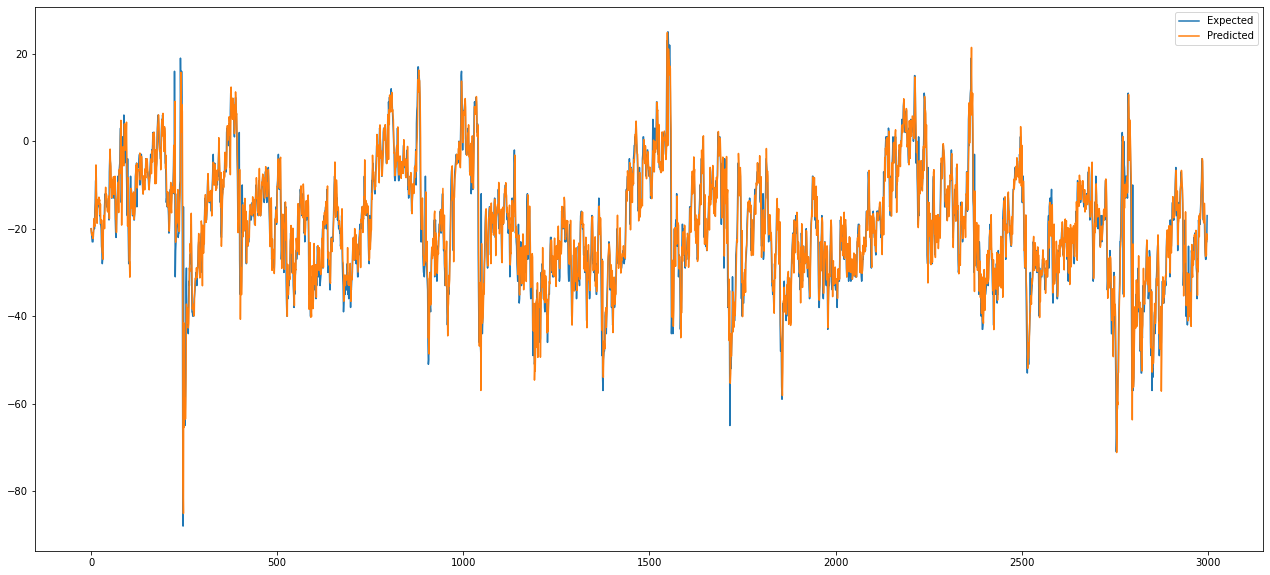

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,10))
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [38]:
len(yhat)

2999